In [2]:
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt

# # 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

plt.rc("font", family="AppleGothic") # 한글표시 (window)
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시

python 3.10.13 (main, Mar 12 2024, 15:59:23) [Clang 15.0.0 (clang-1500.1.0.2.5)]
numpy 1.24.0
pandas 2.2.3
matplotlib 3.8.3


## bar (different style)

### bar style, color

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

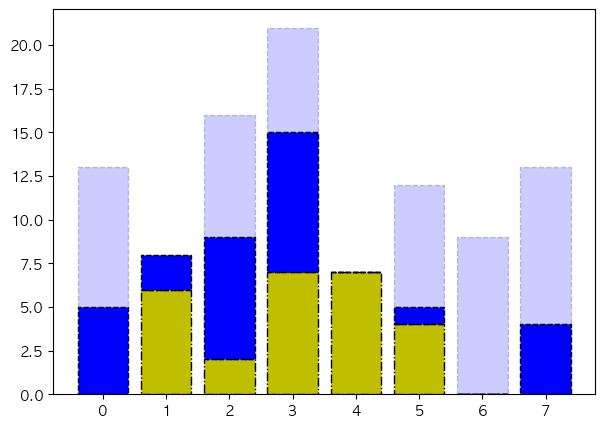

In [3]:
fig=plt.figure(figsize=(7,5), dpi=100)
ax=fig.subplots()

A=np.random.randint(0,10,size=8)
B=np.random.randint(0,10,size=8)
C=np.random.randint(0,10,size=8)
X=np.arange(8)

ax.bar(X, A, color='y', edgecolor='k', linestyle='-.')
ax.bar(X, B, bottom=A, color='b', edgecolor='k', linestyle='dashed')
ax.bar(X, C, bottom=A+B, color='b', edgecolor='k', linestyle='dashed', alpha=0.2)

### pattern (hatch)

<BarContainer object of 10 artists>

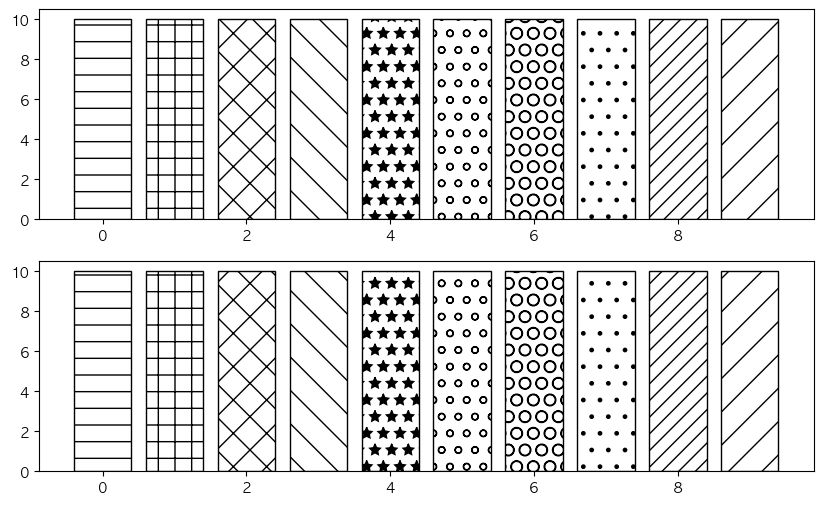

In [4]:
pats = ('-', '+', 'x', '\\', '*', 'o', 'O', '.','//','/')

fig=plt.figure(figsize=(10,6), dpi=100)
ax1, ax2=fig.subplots(2,1)

## ax1
for ii in range(len(pats)):
    _=ax1.bar(ii,10,color='w',edgecolor='k',hatch=pats[ii])

## ax2
ax2.bar(range(10), 10, color='w',edgecolor='k',hatch=pats)

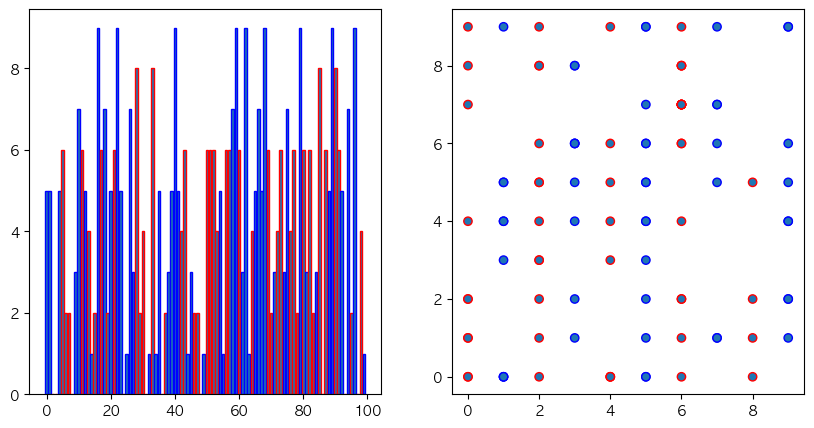

In [5]:
# bar, scatter edgecolor 리스트 사용가능 여부 확인
fig=plt.figure(figsize=(10,5), dpi=100)
ax1,ax2=fig.subplots(1,2).flatten()

df=np.random.randint(0,10,size=(100,2))

## 코드작성
colors = np.where(df[:,0]%2==0,'r','b')
_=ax1.bar(range(len(df)),df[:,0], edgecolor=colors)
_=ax2.scatter(df[:,0],df[:,1], edgecolor=colors)

### 실습1

array([ 3, 10,  9,  8,  1,  2,  8,  8,  4,  6])

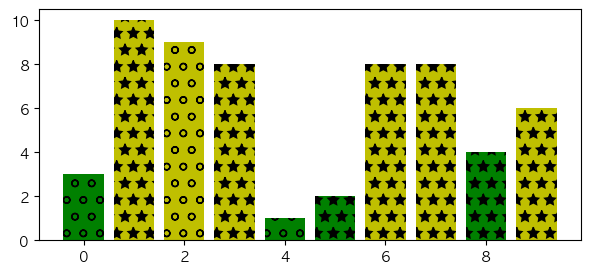

In [7]:
fig=plt.figure(figsize=(7,3), dpi=100)
ax=fig.subplots()

Y=np.random.randint(1,11,size=10)
X=np.arange(len(Y))
Y

## 코드작성
hatches = np.where(Y%2==0,'*','o')
colors = np.where(Y<5,'g','y')
_=ax.bar(X,Y,hatch=hatches, color=colors)

## 제목추가 (set_title)

### 예제1

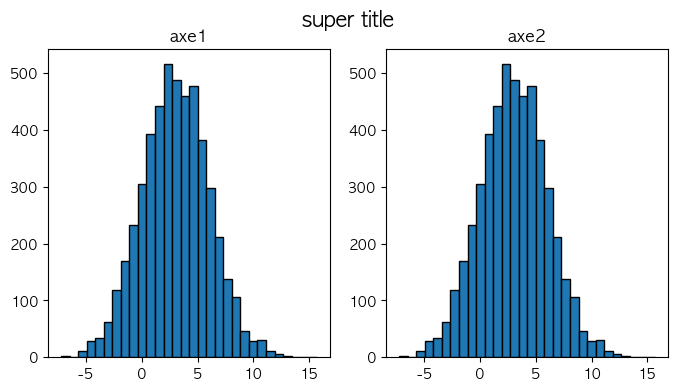

In [16]:
fig=plt.figure(figsize=(8,4), dpi=100)
ax1, ax2=fig.subplots(1,2)

d1=np.random.normal(3,3,size=5000)
_=ax1.hist(d1, edgecolor='k', bins=30)
_=ax1.set_title('axe1')

_=ax2.hist(d1, edgecolor='k', bins=30)
_=ax2.set_title('axe2')

_=fig.suptitle('super title', fontsize=15)

### 예제2

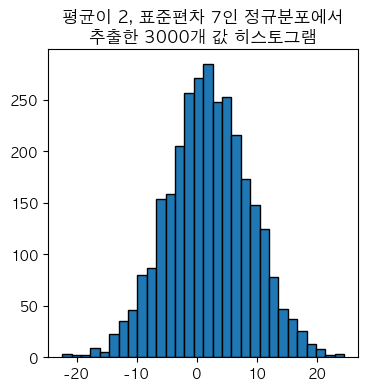

In [17]:
# 평균이 m, 표준편차 s인 정규분포에서 n개 값 sampling 하여 히스토그램 그리기

fig=plt.figure(figsize=(4,4), dpi=100)
ax=fig.subplots()
m,s,n=(2,7,3000)

d1=np.random.normal(m,s,size=n)
_=ax.hist(d1, edgecolor='k', bins=30)
_=ax.set_title('평균이 {}, 표준편차 {}인 정규분포에서\n추출한 {}개 값 히스토그램'.format(m,s,n))


### n by m axs에 flatten 사용하기

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

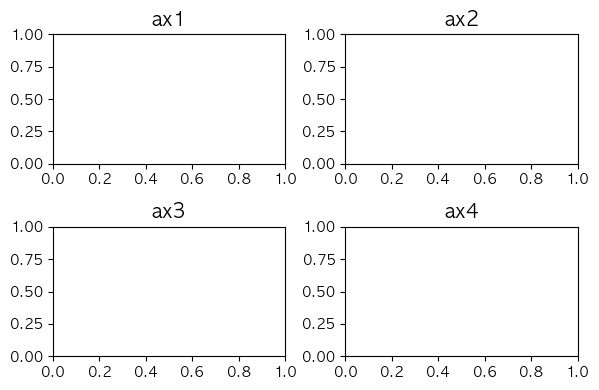

In [18]:
fig=plt.figure(figsize=(6,4), dpi=100)
axs=fig.subplots(2,2)
axs

_=axs[0,0].set_title('ax1', fontsize=14)
_=axs[0,1].set_title('ax2', fontsize=14)
_=axs[1,0].set_title('ax3', fontsize=14)
_=axs[1,1].set_title('ax4', fontsize=14)

fig.tight_layout()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

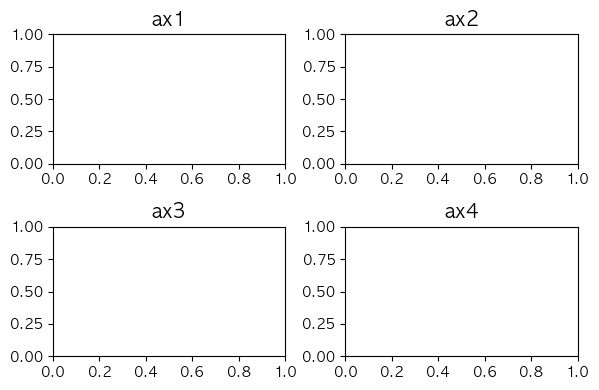

In [19]:
fig=plt.figure(figsize=(6,4), dpi=100)
axs=fig.subplots(2,2).flatten()
axs

_=axs[0].set_title('ax1', fontsize=14)
_=axs[1].set_title('ax2', fontsize=14)
_=axs[2].set_title('ax3', fontsize=14)
_=axs[3].set_title('ax4', fontsize=14)

fig.tight_layout()

### 실습2

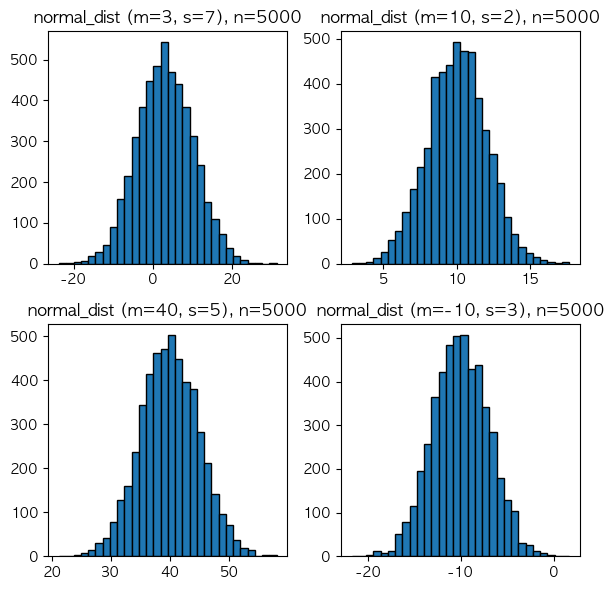

In [20]:
# 네 개의 서로 다른 평균 m, 표준편차 s인 정규분포에서 5000개 값 sampling 하여 각 axe에 히스토그램 그리기
# for loop 사용하시오

fig=plt.figure(figsize=(6,6), dpi=100)
axs=fig.subplots(2,2).flatten()

m_list=[3,10,40,-10]
s_list=[7, 2, 5,  3]

# 코드작성
n = 5000
for i, (m, s) in enumerate(zip(m_list, s_list)):
    x = np.random.normal(m,s,size=n)
    _=axs[i].hist(x, edgecolor='k', bins=30)
    _=axs[i].set_title(f'normal_dist (m={m}, s={s}), n={n}')
    
fig.tight_layout()

## 레이텍(LaTex)

### 예제1

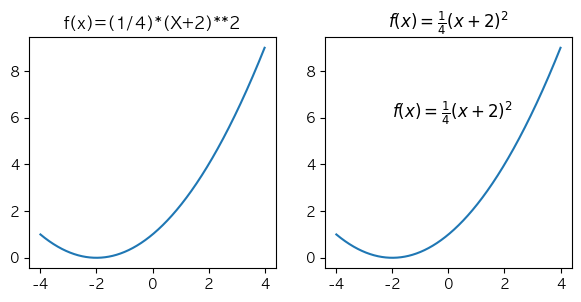

In [21]:
fig=plt.figure(figsize=(7,3), dpi=100)
ax1, ax2=fig.subplots(1,2)

X=np.linspace(-4,4,1000)
Y=(1/4)*(X+2)**2

_=ax1.plot(X,Y)
_=ax1.set_title('f(x)=(1/4)*(X+2)**2')

_=ax2.plot(X,Y)
_=ax2.set_title('$f(x)=\\frac{1}{4}(x+2)^2$')
_=ax2.text(-2,6,'$f(x)=\\frac{1}{4}(x+2)^2$', fontsize=12)

### 예제2

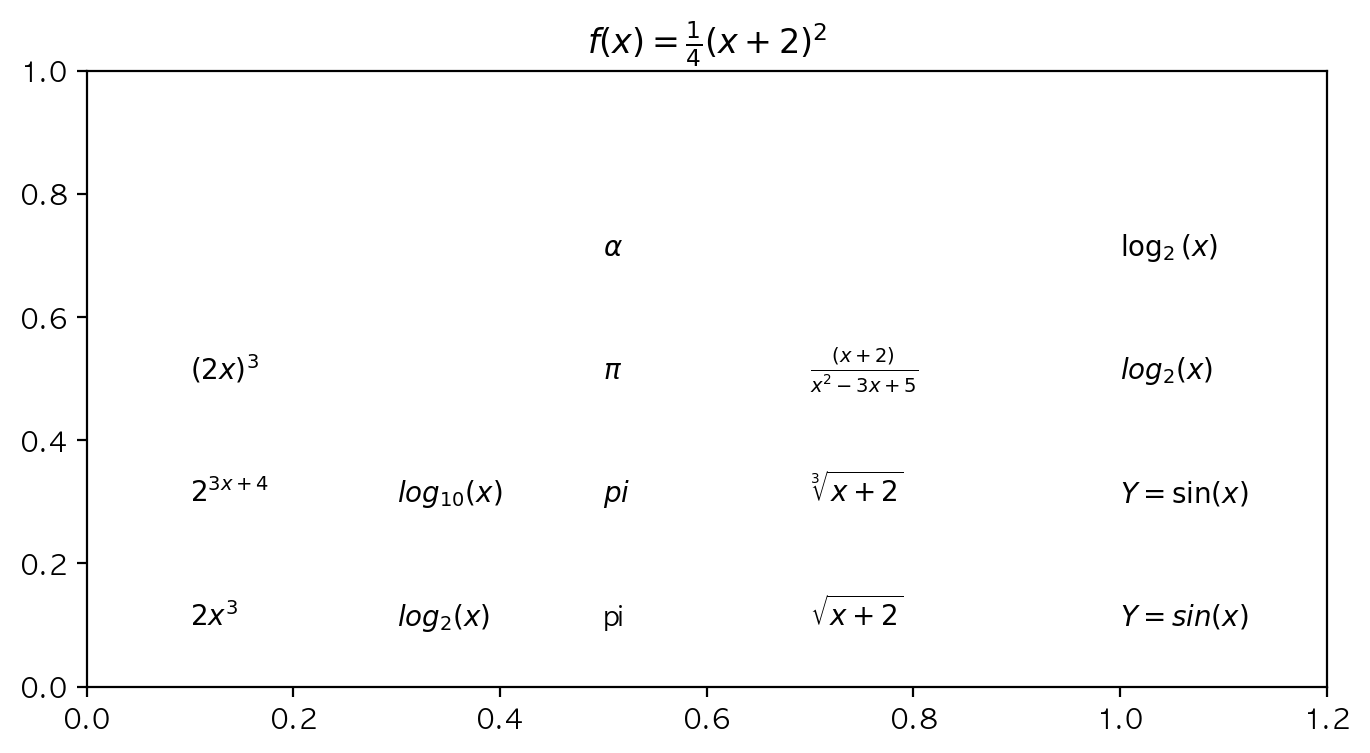

In [22]:
fig=plt.figure(figsize=(8,4), dpi=200)
ax=fig.subplots()

_=ax.set_title('$f(x)=\\frac{1}{4}(x+2)^2$')
_=ax.text(0.1,0.1,'$2x^3$')
_=ax.text(0.1,0.3,'$2^{3x+4}$')
_=ax.text(0.1,0.5,'$(2x)^3$')

_=ax.text(0.3,0.1,'$log_2(x)$')
_=ax.text(0.3,0.3,'$log_{10}(x)$')

_=ax.text(0.5,0.1,'pi')
_=ax.text(0.5,0.3,'$pi$')
_=ax.text(0.5,0.5,'$\\pi$')
_=ax.text(0.5,0.7,'$\\alpha$')

_=ax.text(0.7,0.1,'$\\sqrt{x+2}$')
_=ax.text(0.7,0.3,'$\\sqrt[3]{x+2}$')
_=ax.text(0.7,0.5,'$\\frac{(x+2)}{x^2-3x+5}$')

_=ax.text(1,0.1,'$Y=sin(x)$')
_=ax.text(1,0.3,'$Y=\\sin(x)$')
_=ax.text(1,0.5,'$log_2(x)$')
_=ax.text(1,0.7,'$\\log_2(x)$')

_=ax.set_xlim(0,1.2)

### 예제3

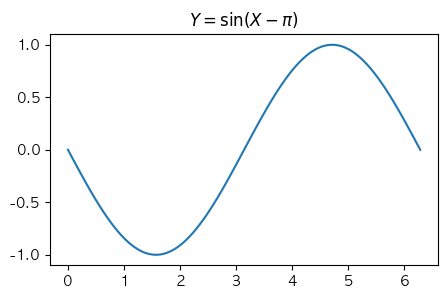

In [23]:
fig=plt.figure(figsize=(5,3), dpi=100)
ax=fig.subplots()

X=np.linspace(0,2*np.pi, 100)
Y=np.sin(X-np.pi)

_=ax.plot(X,Y)
_=ax.set_title("$Y=\\sin(X-\\pi)$")

###  실습3

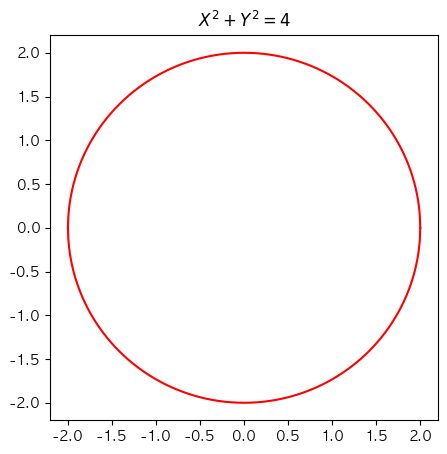

In [30]:
fig=plt.figure(figsize=(5,5), dpi=100)
ax=fig.subplots()

X=np.linspace(-2,2,1000)

## 코드작성
Y = np.sqrt(4-X**2)
_=ax.plot(X,Y,'r')
_=ax.plot(X,-Y,'r')
_=ax.set_title('$X^2+Y^2=4$')

### 실습4

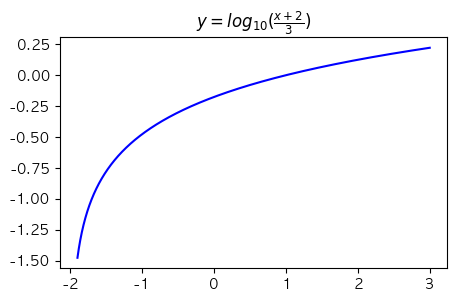

In [33]:
# 결과 그림처럼, 레이텍을 활용하여 title을 추가하시오
# h1) fontsize=16

fig=plt.figure(figsize=(5,3), dpi=100)
ax =fig.subplots()

X=np.linspace(-1.9,3,5000)
Y=np.log10((X+2)/3)
_=ax.plot(X,Y,'b')


#=== 코드작성 ===#
_=ax.set_title('$y=log_{10}(\\frac{x+2}{3})$')

### 실습5

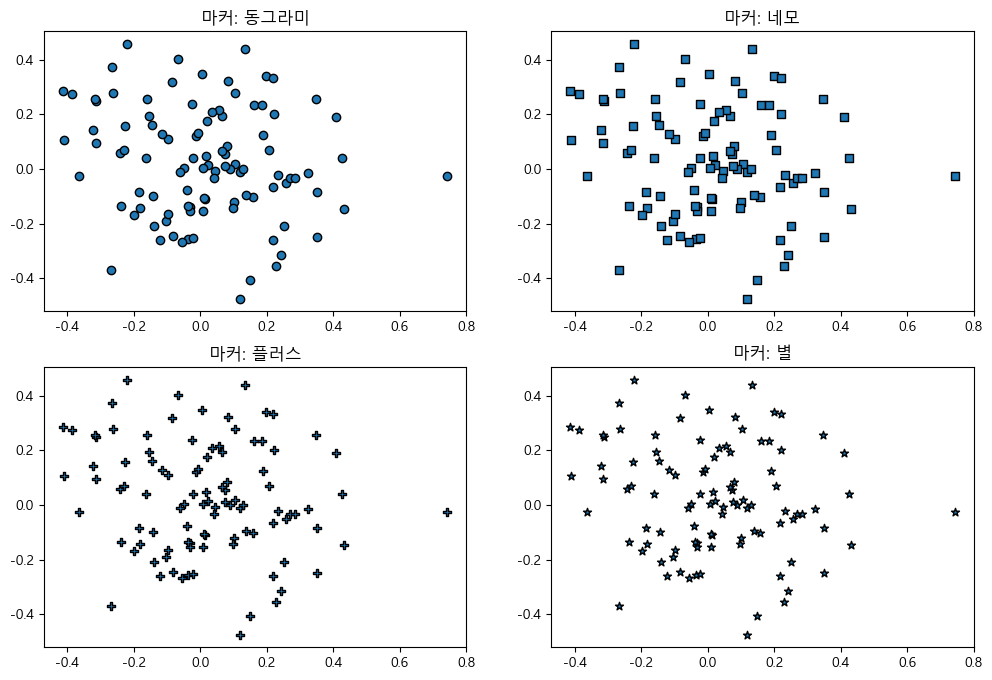

In [54]:
fig=plt.figure(figsize=(12,8), dpi=100)
axs=fig.subplots(2,2).flatten()

marks = np.array(['o','s','P','*'])
mark2name={'o':'동그라미',
           's':'네모',
           'P':'플러스',
           '*':'별'}

d1=np.random.normal(0,0.2,size=(100,2))

## 코드작성
for i, mark in enumerate(marks):
    _=axs[i].scatter(d1[:,0], d1[:,1], marker=mark, edgecolor='k')
    _=axs[i].set_title(f'마커: {mark2name[mark]}')

## X,Y label

### 예제1

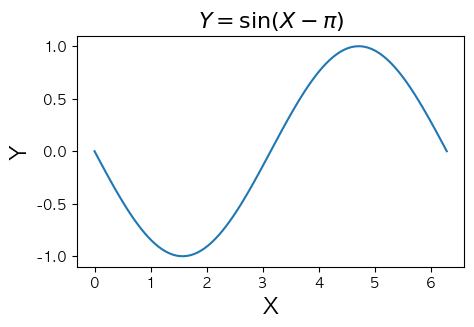

In [34]:
fig=plt.figure(figsize=(5,3), dpi=100)
ax1=fig.subplots()

X=np.linspace(0,2*np.pi, 100)
Y=np.sin(X-np.pi)

_=ax1.plot(X,Y)
_=ax1.set_title("$Y=\\sin(X-\\pi)$", fontsize=16)
_=ax1.set_xlabel('X', fontsize=16)
_=ax1.set_ylabel('Y', fontsize=16)

### 실습6

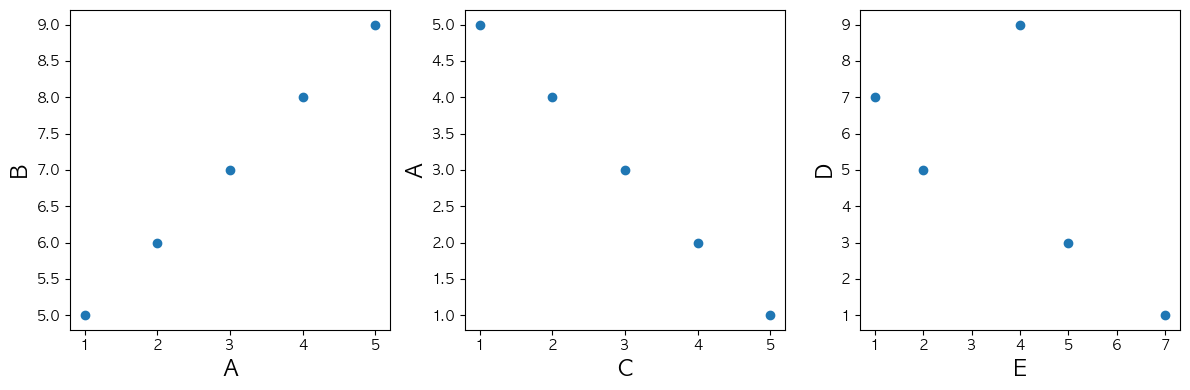

In [35]:
df1=pd.DataFrame({'A':[1,2,3,4,5],
                  'B':[5,6,7,8,9],
                  'C':[5,4,3,2,1],
                  'D':[1,9,7,5,3],
                  'E':[7,4,1,2,5]})

fig=plt.figure(figsize=(12,4), dpi=100)
axs=fig.subplots(1,3)

## 코드작성
def scatter_func(col_x, col_y, axes):
    _=axes.scatter(df1[col_x], df1[col_y])
    _=axes.set_xlabel(col_x, fontsize=16)
    _=axes.set_ylabel(col_y, fontsize=16)
                                        
scatter_func('A','B',axs[0])
scatter_func('C','A',axs[1])
scatter_func('E','D',axs[2])

fig.tight_layout()

## xlim, ylim

### 예제1

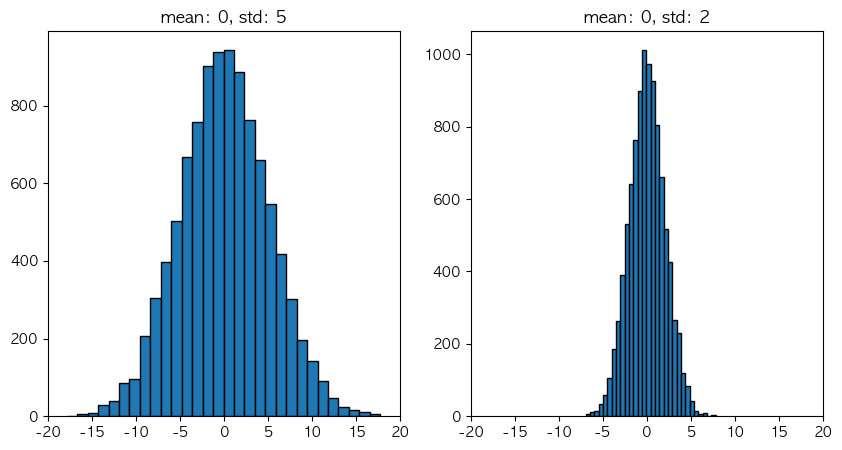

In [36]:
fig=plt.figure(figsize=(10,5), dpi=100)
ax1, ax2=fig.subplots(1,2)

m1=0
s1=5
data=np.random.normal(loc=m1,scale=s1,size=10000)
_=ax1.hist(data, bins=30, edgecolor='k')
_=ax1.set_title('mean: {}, std: {}'.format(m1, s1))
_=ax1.set_xlim(-20,20)

m2=0
s2=2
data=np.random.normal(loc=m2,scale=s2,size=10000)
_=ax2.hist(data, bins=30, edgecolor='k')
_=ax2.set_title('mean: {}, std: {}'.format(m2, s2))
_=ax2.set_xlim(-20,20)

## x_tick, y_tick

### 예제1

array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ])

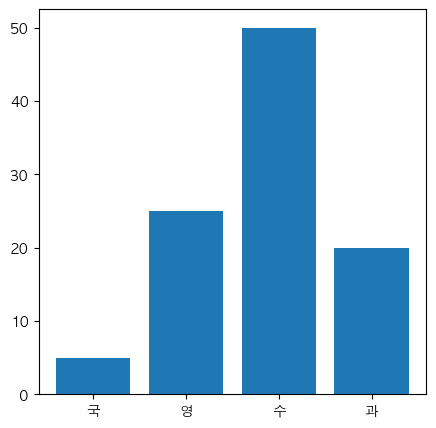

In [38]:
fig=plt.figure(figsize=(5,5), dpi=100)
ax=fig.subplots()

data = np.array([5,25,50,20])
X=np.arange(len(data))
_=ax.bar(X,data)  
ax.get_xticks()

## 방법1
_=ax.set_xticks(X, labels=['국','영','수','과']) # 수행안하면 이상한 tick 생성

## 방법2 예전 방법
# _=ax.set_xticks(X)
# _=ax.set_xticklabels(['국','영','수','과'])

## 방법3
#_=ax.bar(['국','영','수','과'],data) # _=ax.bar(X,data) 대신

### 예제2

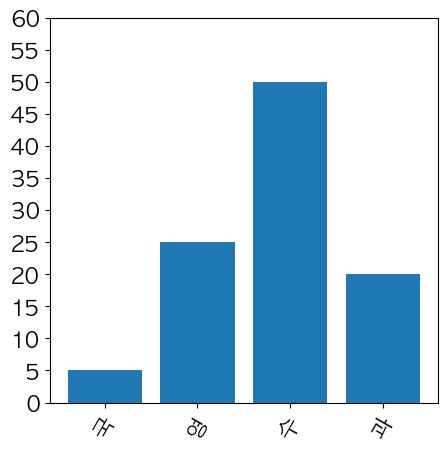

In [40]:
fig=plt.figure(figsize=(5,5), dpi=100)
ax=fig.subplots()

data = np.array([5,25,50,20])
X=np.arange(len(data))
_=ax.bar(X,data)
_=ax.set_xticks(X, labels=list('국영수과'), fontsize=16, rotation=60)
# _=ax.set_xticks(X)
# _=ax.set_xticklabels(['국','영','수','과'], rotation=60, fontsize=16)

_=ax.set_yticks(range(0,61,5), labels=range(0,61,5), fontsize=16)
# _=ax.set_yticks(range(0,61,5))
# _=ax.set_yticklabels(range(0,61,5), fontsize=16)

### 실습7

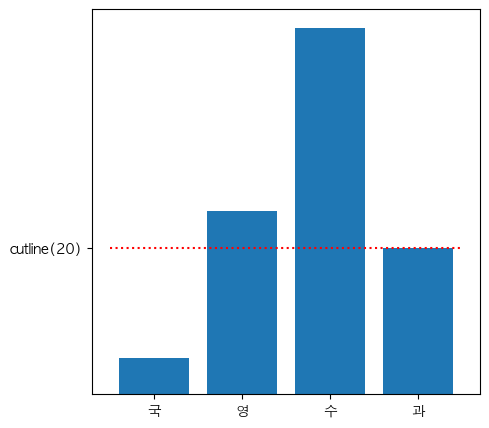

In [49]:
fig=plt.figure(figsize=(5,5), dpi=100)
ax=fig.subplots()

data = np.array([5,25,50,20])
subj = ['국','영','수','과']
cut=20

# 코드작성
_=ax.bar(subj, data)
_=ax.set_yticks([cut],labels=[f'cutline({cut})'])
_=ax.plot([-0.5,3.5],[cut]*2, 'r:')
# _=ax.axhspan(cut,cut+0.1,-0.5,3.5, linestyle=':', color = 'r')
#_=ax.axhline(cut, color='r', linestyle=':')

### 예제3

,eng,mat,his
1st,75,60,90
2nd,80,70,80
3rd,90,70,80
4th,95,90,60


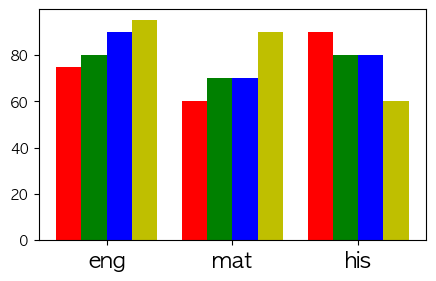

In [50]:
fig=plt.figure(figsize=(5,3), dpi=100)
ax=fig.subplots()

data = pd.read_table('data/dat_bar.txt',index_col=0,sep='\t')
data.head()

w1=0.2
X=np.arange(3)

_=ax.bar(X+0.00, data.loc['1st'], color='r',width=w1)
_=ax.bar(X+w1*1, data.loc['2nd'], color='g', width=w1)
_=ax.bar(X+w1*2, data.loc['3rd'], color='b', width=w1)
_=ax.bar(X+w1*3, data.loc['4th'], color='y', width=w1)

_=ax.set_xticks(X+1.5*w1, labels=data.columns, fontsize=16)

### 실습8

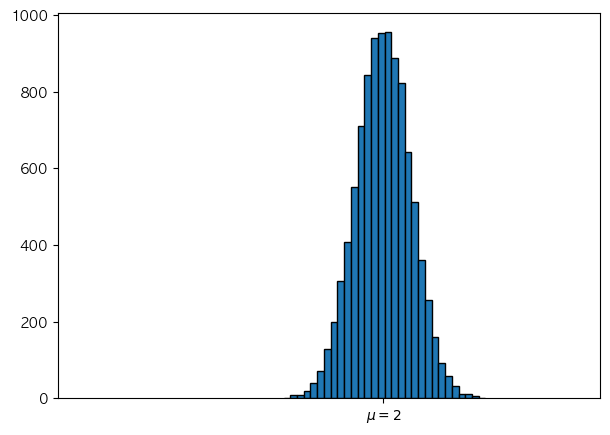

In [51]:
fig=plt.figure(figsize=(7,5), dpi=100)
ax=fig.subplots()

m1=2
s1=1

## 코드작성
x = np.random.normal(m1,s1,10000)
_=ax.hist(x, bins=30, edgecolor='k')
_=ax.set_xlim([-10,10])
_=ax.set_xticks([m1],labels=[f'$\\mu={m1}$'])

### 실습9

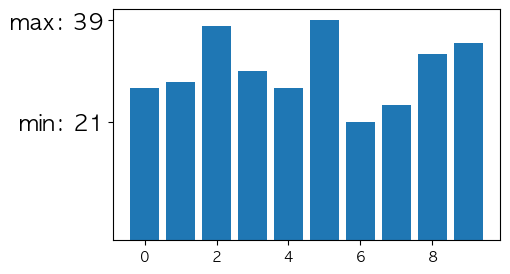

In [52]:
# 주어진 data를 bar그래프로 그리고,
# data의 최대, 최소값을 y tick에 그림과 같이 표시하시오
# h1) np.max(), np.min() 함수 사용

fig=plt.figure(figsize=(5,3), dpi=100)
ax=fig.subplots()

data = np.random.randint(10,40,size=10)
_=ax.bar(range(len(data)),data)

#=== 코드작성 ===#
mx = data.max()
mn = data.min()
_=ax.set_yticks([mx,mn],labels=[f'max: {mx}',f'min: {mn}'], fontsize=16)

## ==== 실습풀이 ====

### 실습1

array([2, 6, 5, 5, 9, 3, 4, 9, 3, 5])

<BarContainer object of 10 artists>

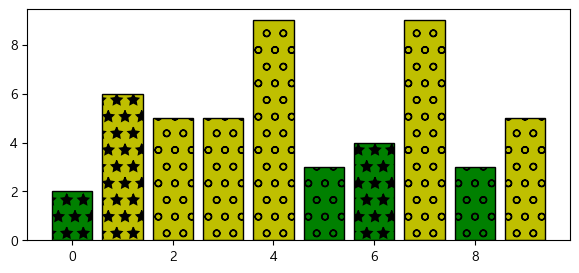

In [5]:
fig=plt.figure(figsize=(7,3), dpi=100)
ax=fig.subplots()

Y=np.random.randint(1,11,size=10)
X=np.arange(len(Y))
Y

## 코드작성
col_list=np.where(Y>=5,'y','g')
hat_list=np.where(Y%2==0,'*','o')

ax.bar(X,Y,edgecolor='k',color=col_list,hatch=hat_list)

### 실습2

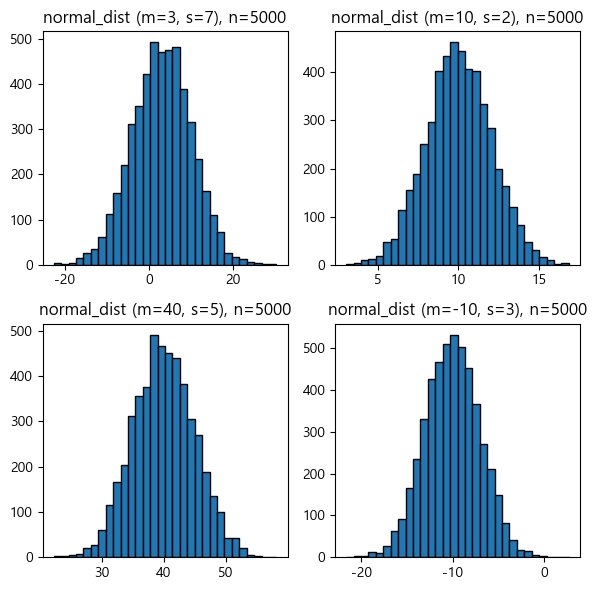

In [11]:
# 네 개의 서로 다른 평균 m, 표준편차 s인 정규분포에서 5000개 값 sampling 하여 각 axe에 히스토그램 그리기
# for loop 사용하시오

fig=plt.figure(figsize=(6,6), dpi=100)
axs=fig.subplots(2,2).flatten()

m_list=[3,10,40,-10]
s_list=[7, 2, 5,  3]

for ii in range(4):
    m=m_list[ii]
    s=s_list[ii]
    ax=axs[ii]
    
    d1=np.random.normal(m,s,5000)
    _=ax.hist(d1, edgecolor='k', bins=30)
    _=ax.set_title('normal_dist (m={}, s={}), n=5000'.format(m,s))
    
fig.tight_layout()

###  실습3

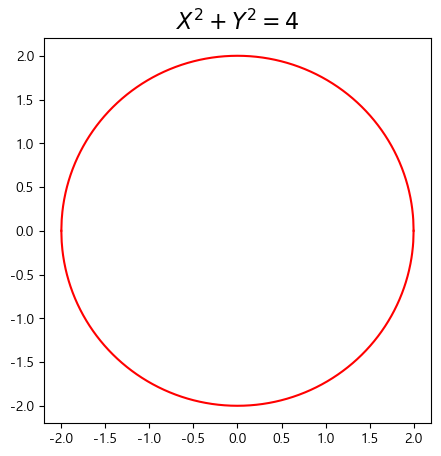

In [27]:
fig=plt.figure(figsize=(5,5), dpi=100)
ax=fig.subplots()

X=np.linspace(-2,2,1000)

Y=np.sqrt(4-X**2)
_=ax.plot(X,Y,'r')
Y=-np.sqrt(4-X**2)
_=ax.plot(X,Y,'r')

_=ax.set_title('$X^2+Y^2=4$', fontsize=16)

### 실습4

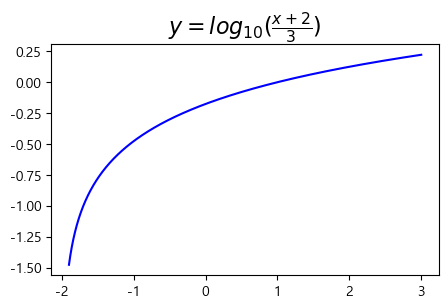

In [50]:
# 결과 그림처럼, 레이텍을 활용하여 title을 추가하시오
# h1) fontsize=16

fig=plt.figure(figsize=(5,3), dpi=100)
ax =fig.subplots()

X=np.linspace(-1.9,3,5000)
Y=np.log10((X+2)/3)
_=ax.plot(X,Y,'b')


#=== 코드작성 ===#
_=ax.set_title('$y=log_{10}(\\frac{x+2}{3})$', fontsize=16)
#=== 코드작성 끝===#

### 실습5

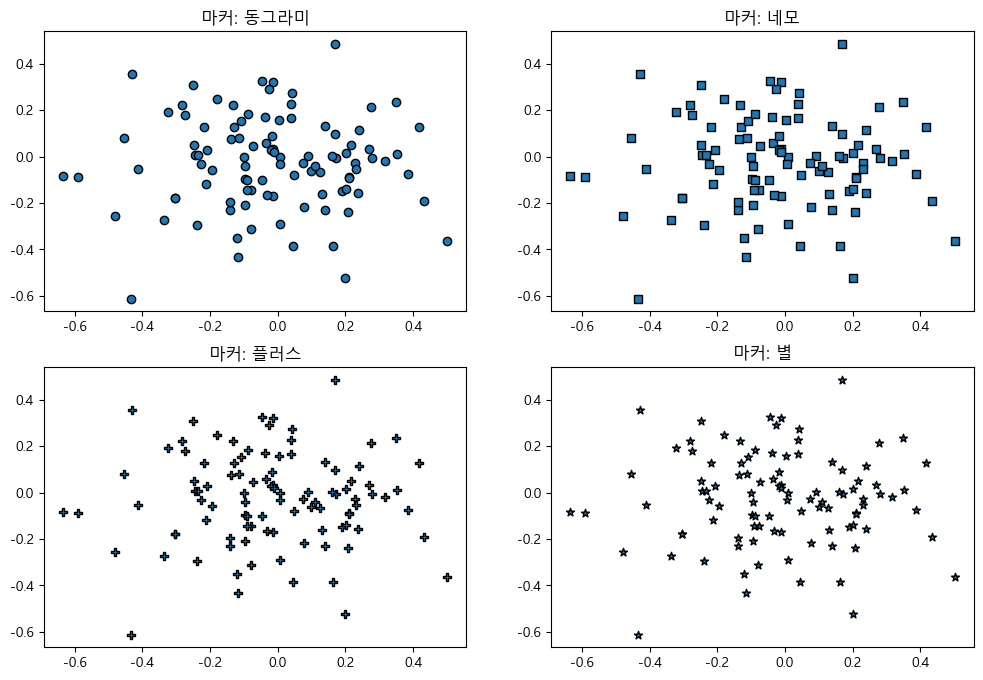

In [28]:
fig=plt.figure(figsize=(12,8), dpi=100)
axs=fig.subplots(2,2).flatten()

marks = np.array(['o','s','P','*'])
mark2name={'o':'동그라미',
           's':'네모',
           'P':'플러스',
           '*':'별'}

d1=np.random.normal(0,0.2,size=(100,2))

for mark, ax in zip(marks,axs):
    _=ax.scatter(d1[:,0],d1[:,1], edgecolor='k',marker=mark)
    _=ax.set_title("마커: {}".format(mark2name[mark]))

### 실습6

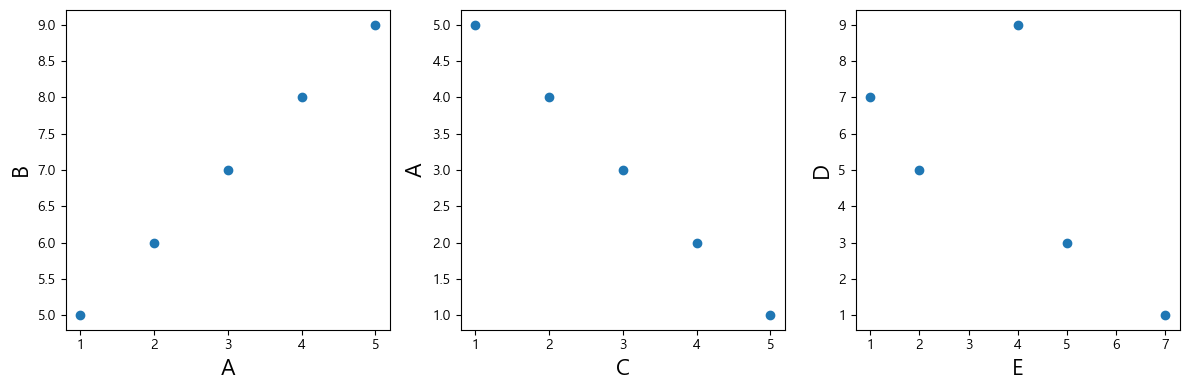

In [43]:
df1=pd.DataFrame({'A':[1,2,3,4,5],
                  'B':[5,6,7,8,9],
                  'C':[5,4,3,2,1],
                  'D':[1,9,7,5,3],
                  'E':[7,4,1,2,5]})

fig=plt.figure(figsize=(12,4), dpi=100)
axs=fig.subplots(1,3)

def scatter_func(X,Y, ax):
    ## scatter
    _=ax.scatter(df1[X], df1[Y])
    
    ## x,y label 
    _=ax.set_xlabel(X, fontsize=16)
    _=ax.set_ylabel(Y, fontsize=16)
                                        
scatter_func('A','B',axs[0])
scatter_func('C','A',axs[1])
scatter_func('E','D',axs[2])

fig.tight_layout()

### 실습7

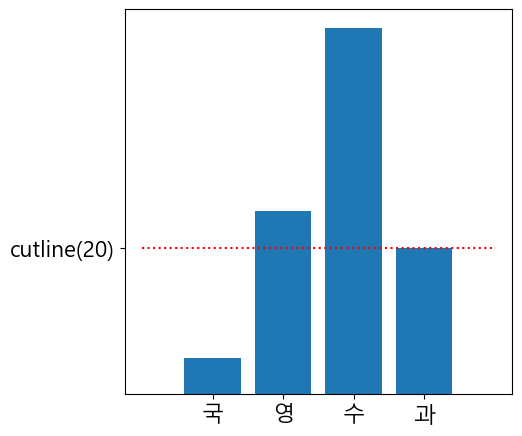

In [75]:
fig=plt.figure(figsize=(5,5), dpi=100)
ax=fig.subplots()

data = np.array([5,25,50,20])
subj = ['국','영','수','과']
cut=20

X=range(len(data))
_=ax.bar(X,data)
_=ax.set_xticks(X)
_=ax.set_xticklabels(subj, fontsize=16)
#_=ax.bar(subj,data)

_=ax.set_yticks([cut])
_=ax.set_yticklabels(['cutline({})'.format(cut)], fontsize=16)

# cutline 점선: 방법1
_=ax.plot([-1,4],[cut,cut], ':r')
# cutline 점선: 방법2
#_=ax.axhline(cut,c='r',linestyle=':')

### 실습8

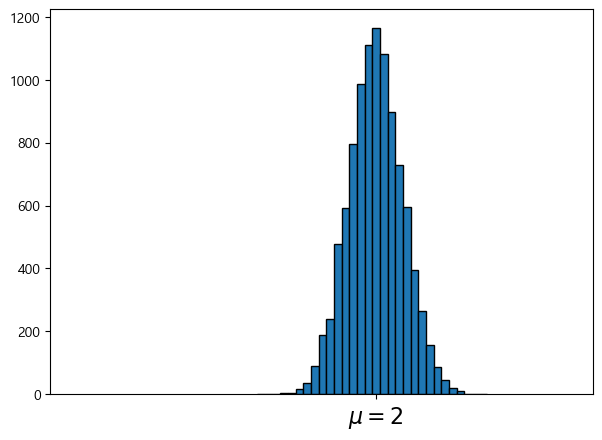

In [44]:
fig=plt.figure(figsize=(7,5), dpi=100)
ax=fig.subplots()

m1=2
s1=1

data=np.random.normal(m1,s1,size=10000)

_=ax.hist(data, bins=30, edgecolor='k')
_=ax.set_xticks([m1])
_=ax.set_xticklabels(['$\\mu={}$'.format(m1)], fontsize=16)
_=ax.set_xlim(-10,10)

### 실습9

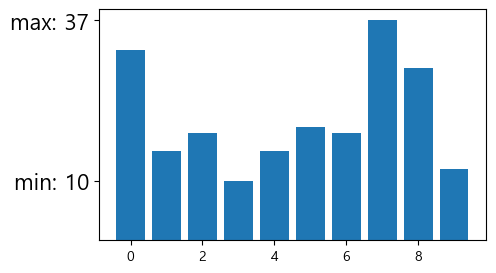

In [48]:
# 주어진 data를 bar그래프로 그리고,
# data의 최대, 최소값을 y tick에 그림과 같이 표시하시오
# h1) np.max(), np.min() 함수 사용

fig=plt.figure(figsize=(5,3), dpi=100)
ax=fig.subplots()

data = np.random.randint(10,40,size=10)
_=ax.bar(range(len(data)),data)

#=== 코드작성 ===#
m1=np.max(data)
n1=np.min(data)

_=ax.set_yticks([m1, n1])
_=ax.set_yticklabels(['max: {}'.format(m1),'min: {}'.format(n1)], fontsize=16)
#=== 코드작성 끝===#
